In [8]:
import tensorflow as tf
tf.__version__

'2.1.0'

## Load data

In [4]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data(test_split=0.2, seed=42)

In [5]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

## Data Preparation: normalization

In [6]:
def norm(x):
    return (x - train_data.mean(axis=0)) / train_data.std(axis=0)
normed_train_data = norm(train_data)
normed_test_data = norm(test_data)


## Build up an MLP

In [56]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[normed_train_data.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
    ])
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae', 'mse'])
    return model

In [57]:
model = build_model()

In [58]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Now try out the model. Take a batch of 10 examples from the training data and call model.predict on it.
example_batch = normed_train_data[:5]
example_result = model.predict(example_batch)
example_result

array([[0.25919864],
       [0.17553371],
       [0.11840235],
       [0.4448859 ],
       [0.5866445 ]], dtype=float32)

### Train the model

In [60]:
# Train the model (in silent mode, verbose=0)
EPOCHS=500
history = model.fit(normed_train_data, train_targets,
                    validation_split = 0.2,
                    epochs=EPOCHS, batch_size=1, verbose=1)

# import tensorflow_docs as tfdocs
# callbacks=[tfdocs.modeling.EpochDots()]

Train on 323 samples, validate on 81 samples
Epoch 1/500
323/323 [==============================] - 2s 6ms/sample - loss: 166.9524 - mae: 9.1947 - mse: 166.9523 - val_loss: 30.8323 - val_mae: 4.0568 - val_mse: 30.8323
Epoch 2/500
323/323 [==============================] - 1s 4ms/sample - loss: 28.0722 - mae: 3.4886 - mse: 28.0722 - val_loss: 20.9111 - val_mae: 3.5903 - val_mse: 20.9111
Epoch 3/500
323/323 [==============================] - 1s 4ms/sample - loss: 20.4090 - mae: 3.0099 - mse: 20.4090 - val_loss: 15.1699 - val_mae: 3.0016 - val_mse: 15.1699
Epoch 4/500
323/323 [==============================] - 1s 4ms/sample - loss: 17.3392 - mae: 2.7838 - mse: 17.3392 - val_loss: 13.2414 - val_mae: 2.9721 - val_mse: 13.2414
Epoch 5/500
323/323 [==============================] - 1s 5ms/sample - loss: 15.7487 - mae: 2.6295 - mse: 15.7487 - val_loss: 12.6810 - val_mae: 2.8643 - val_mse: 12.6810
Epoch 6/500
323/323 [==============================] - 1s 4ms/sample - loss: 14.2883 - mae: 2.4479

Epoch 49/500
323/323 [==============================] - 1s 4ms/sample - loss: 7.5750 - mae: 1.7129 - mse: 7.5750 - val_loss: 11.1071 - val_mae: 2.6167 - val_mse: 11.1071
Epoch 50/500
323/323 [==============================] - 1s 4ms/sample - loss: 6.6310 - mae: 1.6356 - mse: 6.6310 - val_loss: 11.3472 - val_mae: 2.7506 - val_mse: 11.3472
Epoch 51/500
323/323 [==============================] - 1s 4ms/sample - loss: 7.0455 - mae: 1.6453 - mse: 7.0455 - val_loss: 12.2295 - val_mae: 2.8597 - val_mse: 12.2295
Epoch 52/500
323/323 [==============================] - 1s 4ms/sample - loss: 6.7690 - mae: 1.6431 - mse: 6.7690 - val_loss: 10.9393 - val_mae: 2.6019 - val_mse: 10.9393
Epoch 53/500
323/323 [==============================] - 1s 4ms/sample - loss: 6.6729 - mae: 1.6386 - mse: 6.6729 - val_loss: 11.2266 - val_mae: 2.7397 - val_mse: 11.2266
Epoch 54/500
323/323 [==============================] - 1s 5ms/sample - loss: 6.5430 - mae: 1.6283 - mse: 6.5430 - val_loss: 11.8769 - val_mae: 2.7592

323/323 [==============================] - 1s 4ms/sample - loss: 3.6358 - mae: 1.3371 - mse: 3.6358 - val_loss: 11.2270 - val_mae: 2.5917 - val_mse: 11.2270
Epoch 98/500
323/323 [==============================] - 1s 4ms/sample - loss: 3.5155 - mae: 1.3272 - mse: 3.5155 - val_loss: 12.4780 - val_mae: 2.7165 - val_mse: 12.4780
Epoch 99/500
323/323 [==============================] - 1s 5ms/sample - loss: 3.2517 - mae: 1.2526 - mse: 3.2517 - val_loss: 13.2821 - val_mae: 3.0169 - val_mse: 13.2821
Epoch 100/500
323/323 [==============================] - 1s 4ms/sample - loss: 3.3585 - mae: 1.2896 - mse: 3.3585 - val_loss: 11.2254 - val_mae: 2.6328 - val_mse: 11.2254
Epoch 101/500
323/323 [==============================] - 1s 4ms/sample - loss: 3.4928 - mae: 1.3560 - mse: 3.4928 - val_loss: 10.9240 - val_mae: 2.5739 - val_mse: 10.9240
Epoch 102/500
323/323 [==============================] - 1s 4ms/sample - loss: 3.2500 - mae: 1.2646 - mse: 3.2500 - val_loss: 10.6717 - val_mae: 2.5657 - val_mse

323/323 [==============================] - 1s 4ms/sample - loss: 2.5792 - mae: 1.1675 - mse: 2.5792 - val_loss: 11.7823 - val_mae: 2.6790 - val_mse: 11.7823
Epoch 146/500
323/323 [==============================] - 1s 4ms/sample - loss: 2.4707 - mae: 1.1255 - mse: 2.4707 - val_loss: 13.1077 - val_mae: 2.7700 - val_mse: 13.1077
Epoch 147/500
323/323 [==============================] - 1s 4ms/sample - loss: 2.2124 - mae: 1.0843 - mse: 2.2124 - val_loss: 14.1370 - val_mae: 3.0336 - val_mse: 14.1370
Epoch 148/500
323/323 [==============================] - 1s 4ms/sample - loss: 2.4237 - mae: 1.1306 - mse: 2.4237 - val_loss: 13.1350 - val_mae: 2.7674 - val_mse: 13.1350
Epoch 149/500
323/323 [==============================] - 1s 4ms/sample - loss: 2.5020 - mae: 1.1446 - mse: 2.5020 - val_loss: 12.9343 - val_mae: 2.7883 - val_mse: 12.9343
Epoch 150/500
323/323 [==============================] - 1s 4ms/sample - loss: 2.5404 - mae: 1.1766 - mse: 2.5404 - val_loss: 11.6661 - val_mae: 2.6718 - val_m

Epoch 193/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.9540 - mae: 1.0185 - mse: 1.9540 - val_loss: 12.6507 - val_mae: 2.5887 - val_mse: 12.6507
Epoch 194/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.9267 - mae: 1.0140 - mse: 1.9267 - val_loss: 12.6311 - val_mae: 2.6180 - val_mse: 12.6311
Epoch 195/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.9751 - mae: 0.9892 - mse: 1.9751 - val_loss: 12.6673 - val_mae: 2.6697 - val_mse: 12.6673
Epoch 196/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.9388 - mae: 0.9922 - mse: 1.9388 - val_loss: 12.7800 - val_mae: 2.8489 - val_mse: 12.7800
Epoch 197/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.8632 - mae: 0.9993 - mse: 1.8632 - val_loss: 13.5168 - val_mae: 2.7219 - val_mse: 13.5168
Epoch 198/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.8027 - mae: 0.9952 - mse: 1.8027 - val_loss: 13.4015 - val_mae: 

Epoch 241/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.8987 - mae: 0.9439 - mse: 1.8987 - val_loss: 11.9303 - val_mae: 2.6861 - val_mse: 11.9303
Epoch 242/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.5927 - mae: 0.9363 - mse: 1.5927 - val_loss: 13.0075 - val_mae: 2.7279 - val_mse: 13.0075
Epoch 243/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.6649 - mae: 0.9219 - mse: 1.6649 - val_loss: 11.8795 - val_mae: 2.6904 - val_mse: 11.8795
Epoch 244/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.5193 - mae: 0.9071 - mse: 1.5193 - val_loss: 12.7765 - val_mae: 2.5755 - val_mse: 12.7765
Epoch 245/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.7843 - mae: 0.9268 - mse: 1.7843 - val_loss: 12.3054 - val_mae: 2.6426 - val_mse: 12.3054
Epoch 246/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.5220 - mae: 0.9107 - mse: 1.5220 - val_loss: 13.4520 - val_mae: 

Epoch 289/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.6352 - mae: 0.8740 - mse: 1.6352 - val_loss: 13.1564 - val_mae: 2.8222 - val_mse: 13.1564
Epoch 290/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.4316 - mae: 0.8763 - mse: 1.4316 - val_loss: 13.1049 - val_mae: 2.7403 - val_mse: 13.1049
Epoch 291/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.5000 - mae: 0.8847 - mse: 1.5000 - val_loss: 12.0270 - val_mae: 2.5482 - val_mse: 12.0270
Epoch 292/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.4212 - mae: 0.8849 - mse: 1.4212 - val_loss: 11.4347 - val_mae: 2.6819 - val_mse: 11.4347
Epoch 293/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.4654 - mae: 0.8704 - mse: 1.4654 - val_loss: 12.3315 - val_mae: 2.5547 - val_mse: 12.3315
Epoch 294/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.4617 - mae: 0.8538 - mse: 1.4617 - val_loss: 11.2954 - val_mae: 

Epoch 337/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.3362 - mae: 0.8241 - mse: 1.3362 - val_loss: 11.5541 - val_mae: 2.6512 - val_mse: 11.5541
Epoch 338/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.2028 - mae: 0.8218 - mse: 1.2028 - val_loss: 11.3426 - val_mae: 2.6186 - val_mse: 11.3426
Epoch 339/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.3264 - mae: 0.8454 - mse: 1.3264 - val_loss: 10.7832 - val_mae: 2.6211 - val_mse: 10.7832
Epoch 340/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.0305 - mae: 0.7404 - mse: 1.0305 - val_loss: 12.6529 - val_mae: 2.6042 - val_mse: 12.6529
Epoch 341/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.4339 - mae: 0.8224 - mse: 1.4339 - val_loss: 10.7642 - val_mae: 2.4667 - val_mse: 10.7642
Epoch 342/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.3955 - mae: 0.8789 - mse: 1.3955 - val_loss: 12.3449 - val_mae: 

Epoch 385/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.1852 - mae: 0.7850 - mse: 1.1852 - val_loss: 10.9068 - val_mae: 2.5559 - val_mse: 10.9068
Epoch 386/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.1674 - mae: 0.7934 - mse: 1.1674 - val_loss: 11.2693 - val_mae: 2.6546 - val_mse: 11.2693
Epoch 387/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.1474 - mae: 0.7629 - mse: 1.1474 - val_loss: 12.6126 - val_mae: 2.7757 - val_mse: 12.6126
Epoch 388/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.0649 - mae: 0.7251 - mse: 1.0649 - val_loss: 11.5221 - val_mae: 2.6322 - val_mse: 11.5221
Epoch 389/500
323/323 [==============================] - 1s 5ms/sample - loss: 1.0930 - mae: 0.7226 - mse: 1.0930 - val_loss: 11.4250 - val_mae: 2.6831 - val_mse: 11.4250
Epoch 390/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.0519 - mae: 0.7214 - mse: 1.0519 - val_loss: 10.4422 - val_mae: 

Epoch 433/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.1007 - mae: 0.7516 - mse: 1.1007 - val_loss: 11.2069 - val_mae: 2.5459 - val_mse: 11.2069
Epoch 434/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.0829 - mae: 0.7608 - mse: 1.0829 - val_loss: 11.3626 - val_mae: 2.5592 - val_mse: 11.3626
Epoch 435/500
323/323 [==============================] - 1s 4ms/sample - loss: 0.9438 - mae: 0.7034 - mse: 0.9438 - val_loss: 11.5438 - val_mae: 2.6560 - val_mse: 11.5438
Epoch 436/500
323/323 [==============================] - 1s 5ms/sample - loss: 1.0804 - mae: 0.7362 - mse: 1.0804 - val_loss: 10.9191 - val_mae: 2.5078 - val_mse: 10.9191
Epoch 437/500
323/323 [==============================] - 1s 5ms/sample - loss: 1.0528 - mae: 0.6997 - mse: 1.0528 - val_loss: 10.8529 - val_mae: 2.4433 - val_mse: 10.8529
Epoch 438/500
323/323 [==============================] - 1s 4ms/sample - loss: 0.9976 - mae: 0.6961 - mse: 0.9976 - val_loss: 10.6665 - val_mae: 

Epoch 481/500
323/323 [==============================] - 1s 4ms/sample - loss: 0.9583 - mae: 0.7263 - mse: 0.9583 - val_loss: 10.6242 - val_mae: 2.5140 - val_mse: 10.6242
Epoch 482/500
323/323 [==============================] - 1s 4ms/sample - loss: 0.8185 - mae: 0.6454 - mse: 0.8185 - val_loss: 10.1881 - val_mae: 2.4798 - val_mse: 10.1881
Epoch 483/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.2745 - mae: 0.7116 - mse: 1.2745 - val_loss: 11.7813 - val_mae: 2.6603 - val_mse: 11.7813
Epoch 484/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.1161 - mae: 0.7173 - mse: 1.1161 - val_loss: 10.5507 - val_mae: 2.4302 - val_mse: 10.5507
Epoch 485/500
323/323 [==============================] - 1s 4ms/sample - loss: 0.9555 - mae: 0.6856 - mse: 0.9555 - val_loss: 9.6805 - val_mae: 2.3669 - val_mse: 9.6805
Epoch 486/500
323/323 [==============================] - 1s 4ms/sample - loss: 1.1336 - mae: 0.7301 - mse: 1.1336 - val_loss: 11.3614 - val_mae: 2.

In [61]:
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.975141,0.698046,0.975141,10.963542,2.576324,10.963542,495
496,0.990537,0.693270,0.990537,11.125978,2.607741,11.125977,496
497,0.983059,0.682096,0.983059,10.037512,2.453409,10.037512,497
498,0.939694,0.644850,0.939694,13.183809,2.960482,13.183811,498
499,1.006985,0.703892,1.006985,12.531056,2.653569,12.531056,499


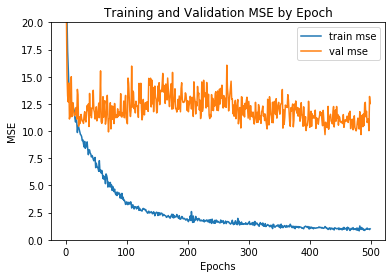

In [62]:
import matplotlib.pyplot as plt

plt.plot(hist['epoch'], hist['mse'], label = "train mse")
plt.plot(hist['epoch'], hist['val_mse'], label = "val mse")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim((0, 20)) 
# Set a title of the current axes.
plt.title('Training and Validation MSE by Epoch')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [64]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

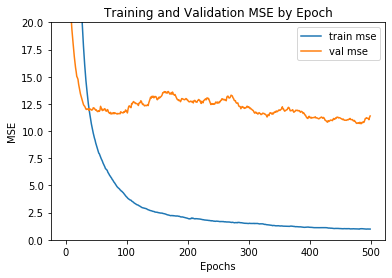

In [70]:
import matplotlib.pyplot as plt

plt.plot(hist['epoch'], smooth_curve(hist['mse']), label = "train mse")
plt.plot(hist['epoch'], smooth_curve(hist['val_mse']), label = "val mse")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim((0, 20)) 
# Set a title of the current axes.
plt.title('Training and Validation MSE by Epoch')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## Final fit model with full data & test model

In [71]:
model.fit(normed_train_data, train_targets, epochs=90, batch_size=1, verbose=1)

Train on 404 samples
Epoch 1/90
404/404 [==============================] - 2s 4ms/sample - loss: 3.3402 - mae: 1.1853 - mse: 3.3402
Epoch 2/90
404/404 [==============================] - 2s 4ms/sample - loss: 3.1641 - mae: 1.1786 - mse: 3.1641
Epoch 3/90
404/404 [==============================] - 2s 4ms/sample - loss: 2.6778 - mae: 1.0690 - mse: 2.6778
Epoch 4/90
404/404 [==============================] - 2s 4ms/sample - loss: 2.6247 - mae: 1.1008 - mse: 2.6247
Epoch 5/90
404/404 [==============================] - 2s 4ms/sample - loss: 2.4738 - mae: 1.0893 - mse: 2.4738
Epoch 6/90
404/404 [==============================] - 2s 4ms/sample - loss: 2.7984 - mae: 1.1029 - mse: 2.7984
Epoch 7/90
404/404 [==============================] - 2s 4ms/sample - loss: 2.3201 - mae: 1.0431 - mse: 2.3201
Epoch 8/90
404/404 [==============================] - 2s 4ms/sample - loss: 2.2776 - mae: 1.0730 - mse: 2.2776
Epoch 9/90
404/404 [==============================] - 2s 4ms/sample - loss: 2.2501 - mae: 1

404/404 [==============================] - 2s 4ms/sample - loss: 1.3707 - mae: 0.8300 - mse: 1.3707
Epoch 74/90
404/404 [==============================] - 2s 4ms/sample - loss: 1.1870 - mae: 0.7615 - mse: 1.1870
Epoch 75/90
404/404 [==============================] - 2s 4ms/sample - loss: 1.2080 - mae: 0.7879 - mse: 1.2080
Epoch 76/90
404/404 [==============================] - 2s 4ms/sample - loss: 1.2430 - mae: 0.8219 - mse: 1.2430
Epoch 77/90
404/404 [==============================] - 2s 4ms/sample - loss: 1.2008 - mae: 0.7823 - mse: 1.2008
Epoch 78/90
404/404 [==============================] - 2s 4ms/sample - loss: 1.3295 - mae: 0.7985 - mse: 1.3295
Epoch 79/90
404/404 [==============================] - 2s 4ms/sample - loss: 1.3059 - mae: 0.8238 - mse: 1.3059
Epoch 80/90
404/404 [==============================] - 2s 4ms/sample - loss: 1.1566 - mae: 0.7804 - mse: 1.1566
Epoch 81/90
404/404 [==============================] - 2s 4ms/sample - loss: 1.1506 - mae: 0.7936 - mse: 1.1506
Epoc

In [72]:
loss, mae, mse = model.evaluate(normed_test_data, test_targets, verbose=2)

102/102 - 0s - loss: 10.5723 - mae: 2.4699 - mse: 10.5723


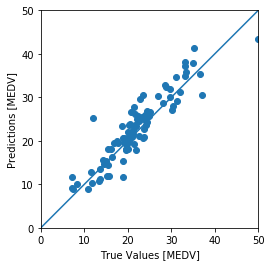

In [76]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_targets, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)